In [15]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import h5py
import seaborn as sns
import pandas as pd
import configs
from tensorboard.backend.event_processing import event_accumulator
from scipy.stats import pearsonr

import torch
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader

from predify.utils.training import train_pcoders, eval_pcoders

from models.networks_2022 import BranchedNetwork
from data.NoisyDataset import NoisyDataset, FullNoisyDataset

In [3]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
pickle_dir = f'{engram_dir}pickles/'

In [4]:
bgs = ['pinkNoise', 'AudScene', 'Babble8Spkr']
snrs = [-9.0, -6.0, -3.0, 0.0, 3.0]

In [5]:
results = {'bg': [], 'snr': [], 'xc': [], 't': []}
for bg in bgs:
    for snr in snrs:
        pfile = f'{pickle_dir}{bg}_{snr}_stationarity.p'
        with open(pfile, 'rb') as f:
            _results = pickle.load(f)
            for key in results.keys():
                results[key].extend(_results[key])

In [7]:
df = pd.DataFrame(results)

Text(0.5, 1.0, 'Autocorrelation for SNR = -9')

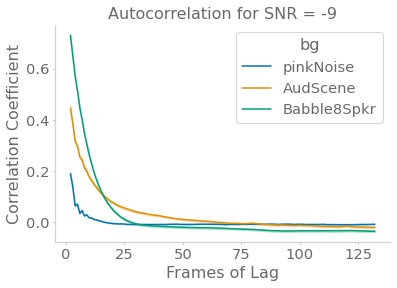

In [21]:
sns.lineplot(
    x='t', y='xc', hue='bg', data=df[df['snr']==-9.0]
    )
plt.ylabel('Correlation Coefficient')
plt.xlabel('Frames of Lag')
plt.title('Autocorrelation for SNR = -9')

Text(0.5, 1.0, 'Autocorrelation for SNR = 3')

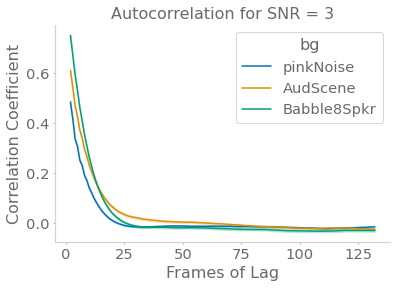

In [22]:
sns.lineplot(
    x='t', y='xc', hue='bg', data=df[df['snr']==3.0]
    )
plt.ylabel('Correlation Coefficient')
plt.xlabel('Frames of Lag')
plt.title('Autocorrelation for SNR = 3')

Text(0.5, 1.0, 'Autocorrelation for Auditory Scene')

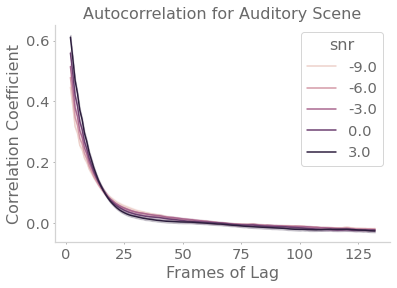

In [23]:
sns.lineplot(
    x='t', y='xc', hue='snr', data=df[df['bg']=='AudScene']
    )
plt.ylabel('Correlation Coefficient')
plt.xlabel('Frames of Lag')
plt.title('Autocorrelation for Auditory Scene')

Text(0.5, 1.0, 'Autocorrelation for Babble 8 Speaker')

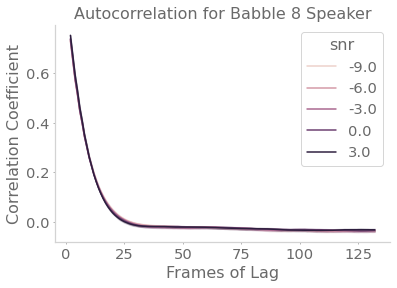

In [24]:
sns.lineplot(
    x='t', y='xc', hue='snr', data=df[df['bg']=='Babble8Spkr']
    )
plt.ylabel('Correlation Coefficient')
plt.xlabel('Frames of Lag')
plt.title('Autocorrelation for Babble 8 Speaker')

Text(0.5, 1.0, 'Autocorrelation for Pink Noise')

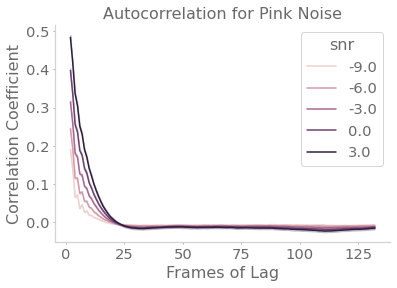

In [25]:
sns.lineplot(
    x='t', y='xc', hue='snr', data=df[df['bg']=='pinkNoise']
    )
plt.ylabel('Correlation Coefficient')
plt.xlabel('Frames of Lag')
plt.title('Autocorrelation for Pink Noise')